## Reading the data

In [2]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


df = pd.read_csv("../../corpus_sprint3_balanced_cp.csv", encoding="utf-8")
df = df.dropna()
print(df)
print(df.shape)

model = Doc2Vec.load("../../model_doc2vec_balanced_20epochs")

                                                Product  \
0             Payday loan, title loan, or personal loan   
1             Payday loan, title loan, or personal loan   
2                                 Vehicle loan or lease   
3     Money transfer, virtual currency, or money ser...   
4             Payday loan, title loan, or personal loan   
...                                                 ...   
9405                        Checking or savings account   
9406                            Bank account or service   
9407                            Bank account or service   
9408                            Bank account or service   
9409                            Bank account or service   

                           Consumer complaint narrative  
0     they would not let me pay my loan off 2 days b...  
1     service finance are liars and are charging me ...  
2     on xx/xx/ i signed a car loan agreement to fin...  
3     we hired and debt collection to handle collect...  
4

In [3]:
df_concat = model.docvecs.vectors_docs

## Applying UMAP

In [4]:
import umap
data_reduced = umap.UMAP().fit_transform(df_concat)

In [5]:
print(data_reduced.shape)

(9410, 2)


## Applying k-means

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


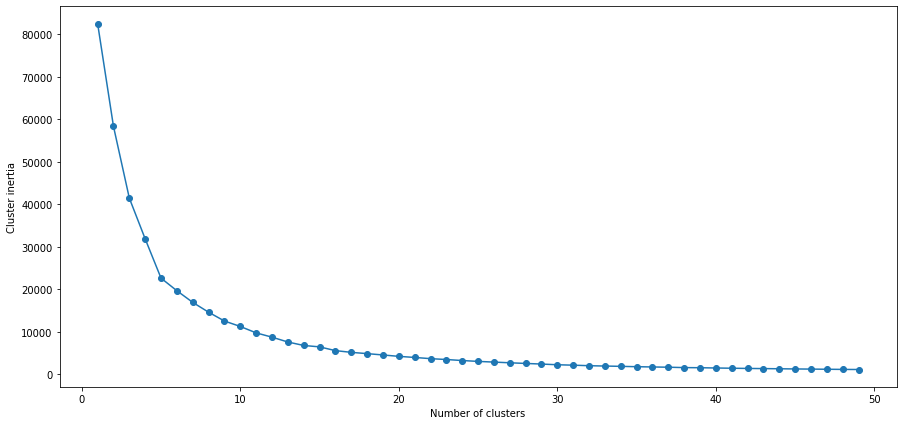

In [7]:
inertia = []
k_min=1
k_max=50
for i in range(k_min, k_max):
    print(i)
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(data_reduced)
    inertia.append(km.inertia_)
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(range(k_min,k_max), inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia')
plt.show()

## Silhouette scores

For n_clusters = 4 The average silhouette_score is : 0.44033977
For n_clusters = 5 The average silhouette_score is : 0.45814583
For n_clusters = 6 The average silhouette_score is : 0.40184867
For n_clusters = 7 The average silhouette_score is : 0.37666008
For n_clusters = 8 The average silhouette_score is : 0.37960464
For n_clusters = 9 The average silhouette_score is : 0.38073462
For n_clusters = 10 The average silhouette_score is : 0.38371128
For n_clusters = 11 The average silhouette_score is : 0.38660455
For n_clusters = 12 The average silhouette_score is : 0.38039643
For n_clusters = 13 The average silhouette_score is : 0.39409325
For n_clusters = 14 The average silhouette_score is : 0.39615947
For n_clusters = 15 The average silhouette_score is : 0.38291955
For n_clusters = 16 The average silhouette_score is : 0.38271263
For n_clusters = 17 The average silhouette_score is : 0.37451473
For n_clusters = 18 The average silhouette_score is : 0.37586415
For n_clusters = 19 The average

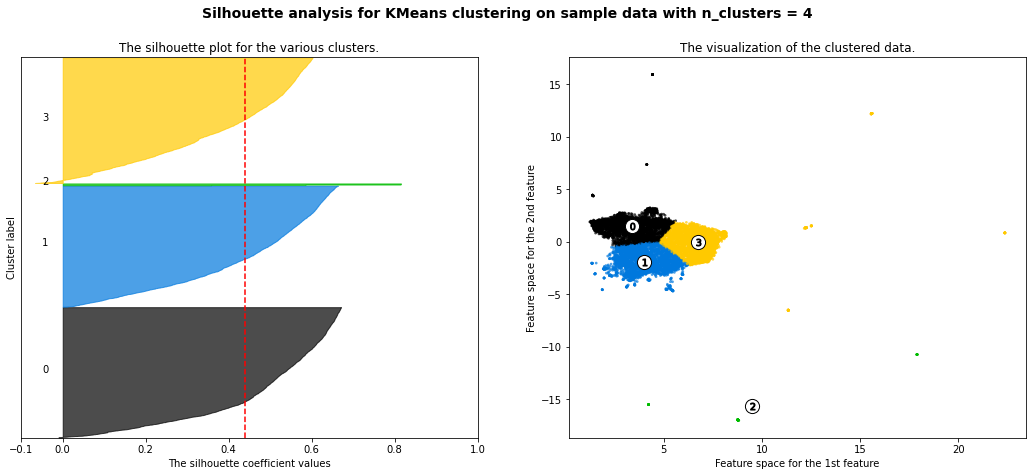

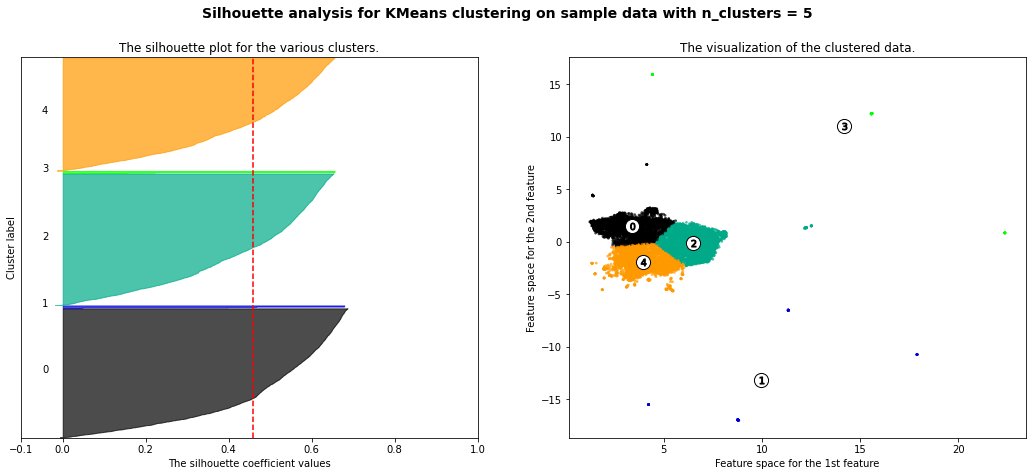

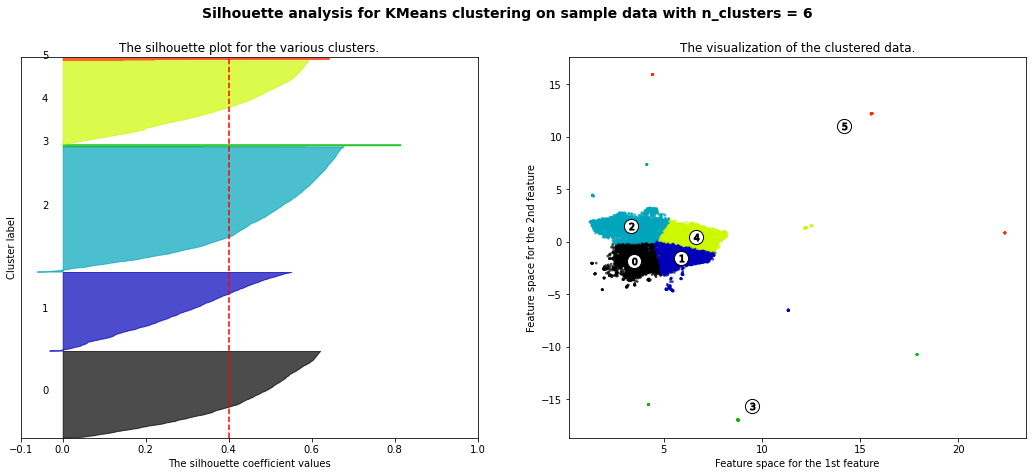

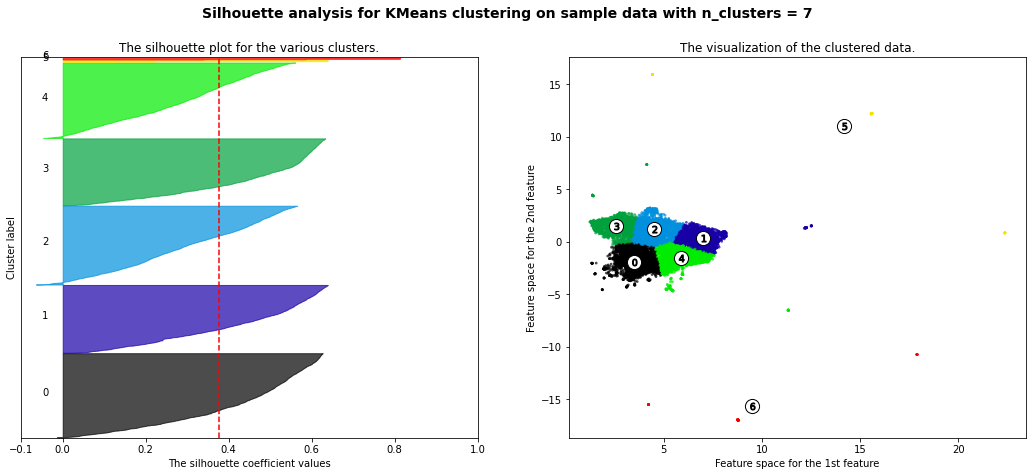

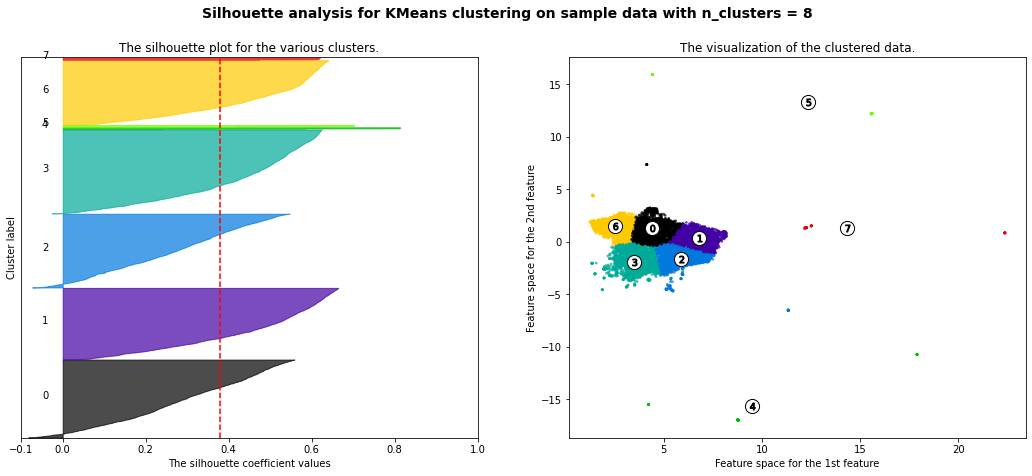

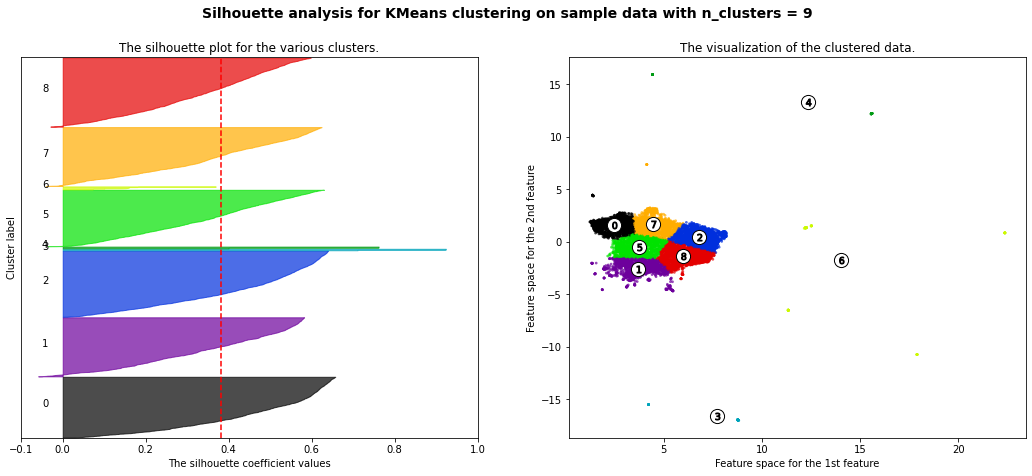

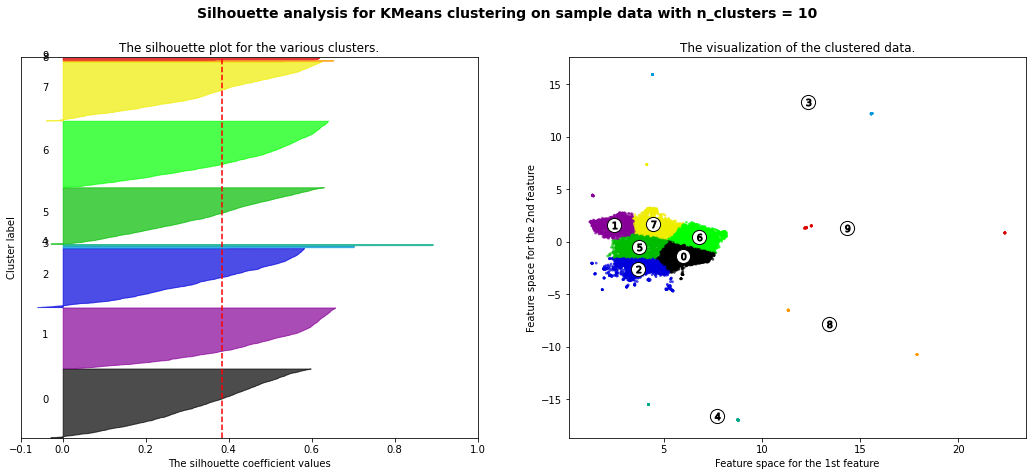

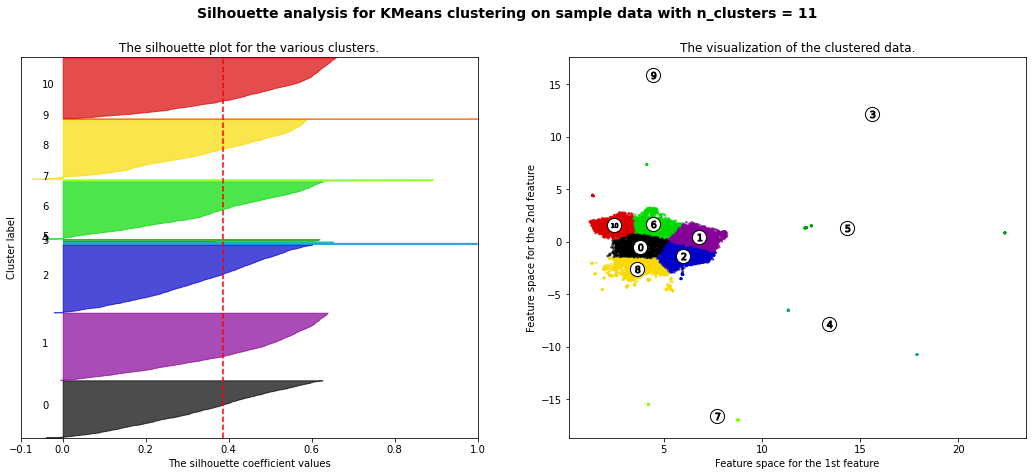

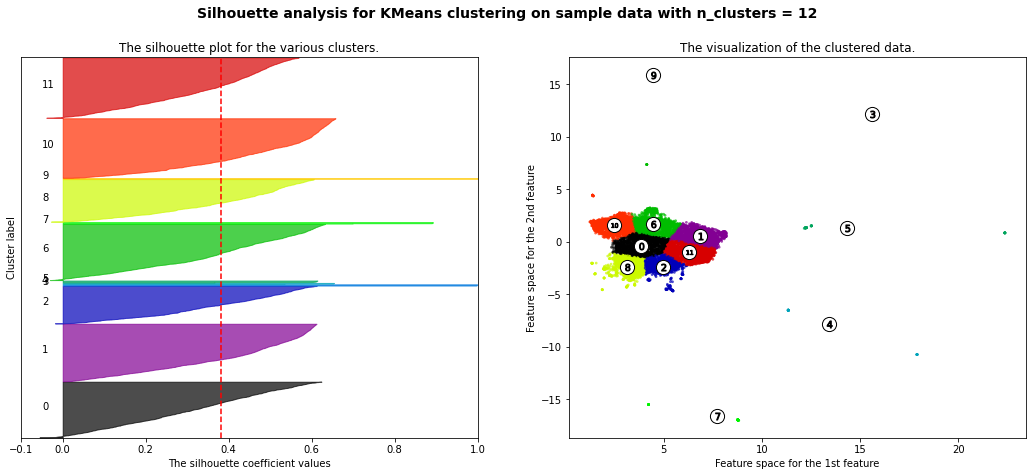

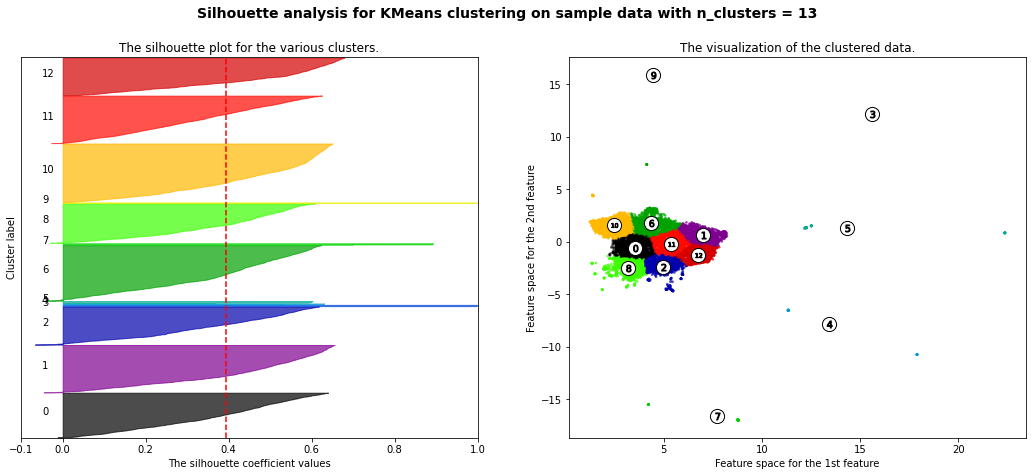

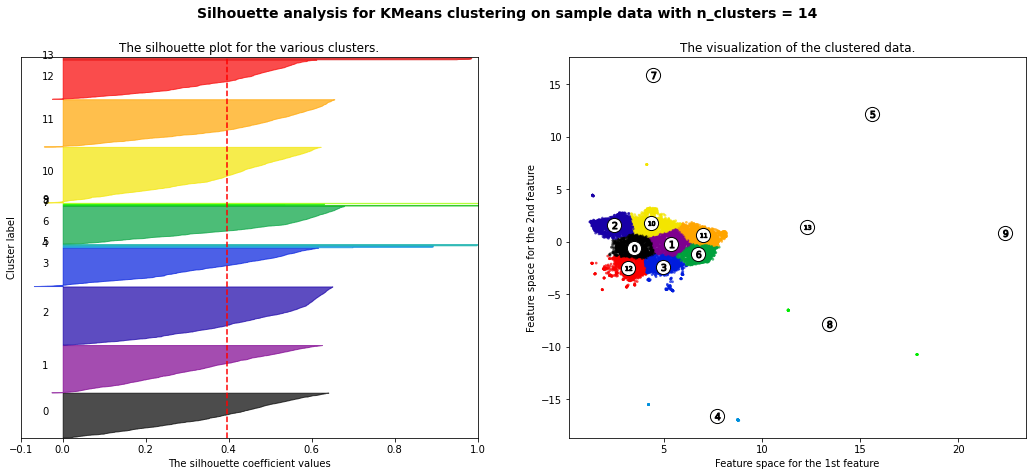

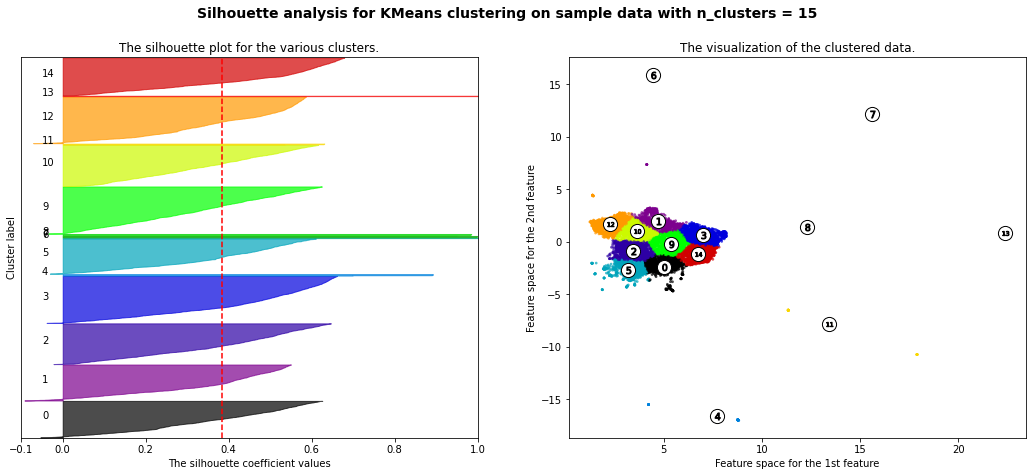

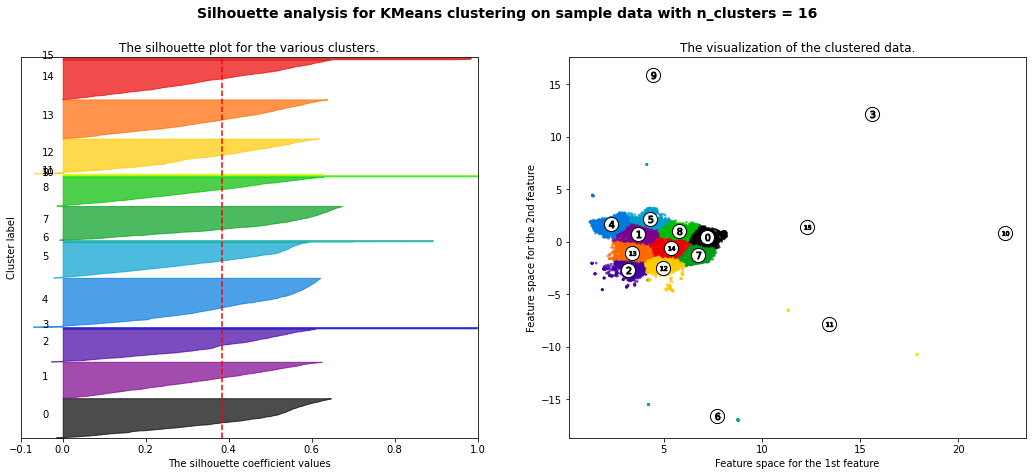

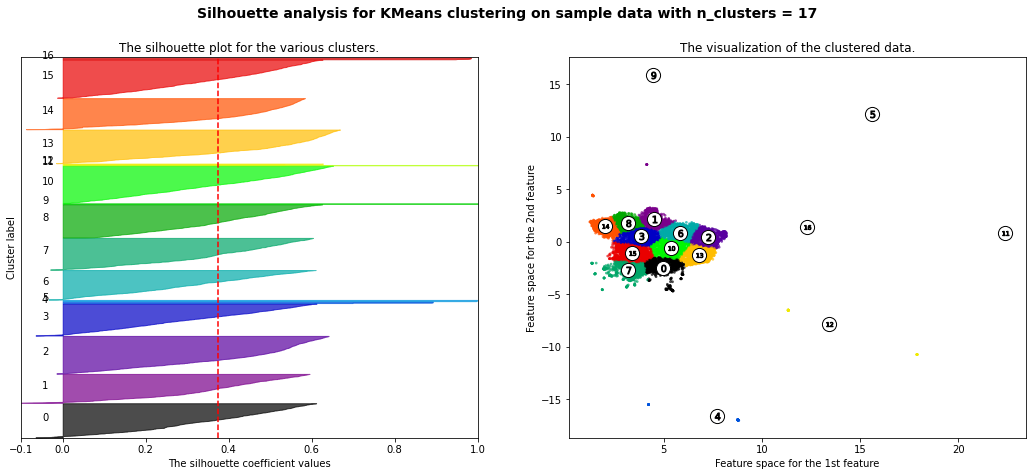

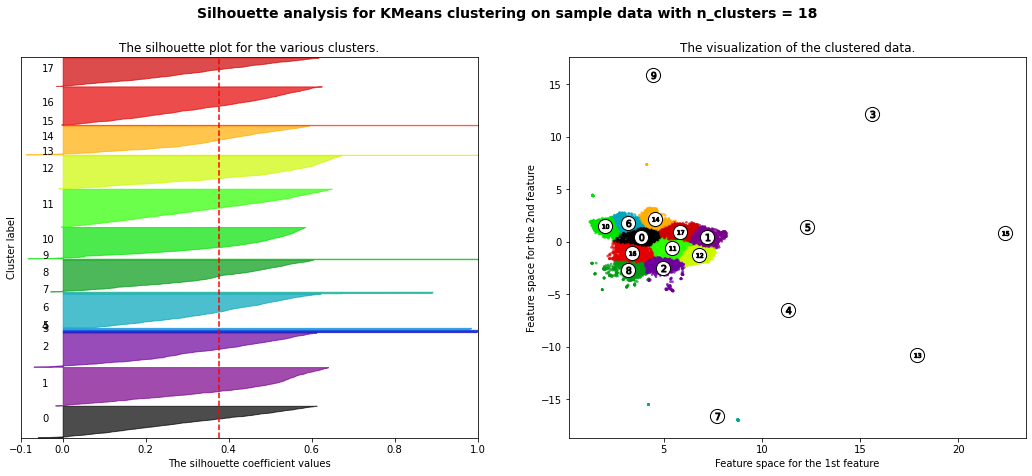

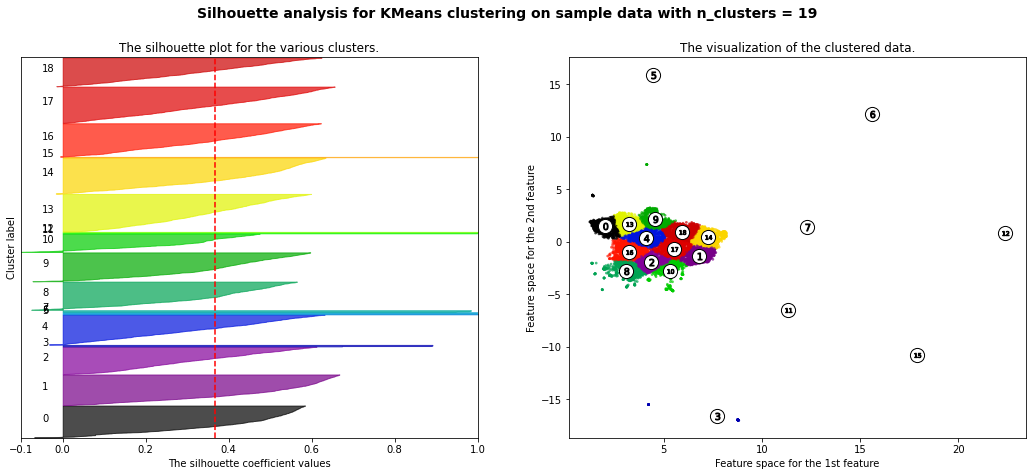

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range(4,20):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_reduced) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_reduced, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_reduced[:, 0], data_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Analyzing with narrative

In [9]:
number_clusters = 16
km = KMeans(n_clusters=number_clusters,init='k-means++')
indexes = km.fit_predict(data_reduced)
centroids = km.cluster_centers_

#v_df = pd.DataFrame(vectors)
df_result = pd.concat([df, pd.DataFrame(indexes)], axis = 1)
print(df_result)

                                                Product  \
0             Payday loan, title loan, or personal loan   
1             Payday loan, title loan, or personal loan   
2                                 Vehicle loan or lease   
3     Money transfer, virtual currency, or money ser...   
4             Payday loan, title loan, or personal loan   
...                                                 ...   
9405                        Checking or savings account   
9406                            Bank account or service   
9407                            Bank account or service   
9408                            Bank account or service   
9409                            Bank account or service   

                           Consumer complaint narrative   0  
0     they would not let me pay my loan off 2 days b...   7  
1     service finance are liars and are charging me ...   4  
2     on xx/xx/ i signed a car loan agreement to fin...   4  
3     we hired and debt collection to handl

Cluster number: 0
i purchased a from ga in of . at the time of the purchase i was told that a 1000.00 down payment would be needed but was not told that on the phone when i was approved. i told the salesman i did not have 1000.00 but he could take it out of my account within two weeks. i gave my debit card information before i left and assured him that it would be in my account. two weeks passed and then the year passed still no removal of my money which i assumed had been taken out. no contact from the dealership regarding the matter a month after i purchased the car two months three months nothing. then about several months ago i would say around xx/xx/ i received two separate calls from the dealership informing me my down payment was never received. i called back twice and left messages to the finance manager no call backs ever. no certified letters sent to me no other phone calls until today xx/xx/ from who i am assuming is the head collector. she left me a voicemail stating that i

Number of entries: 1004


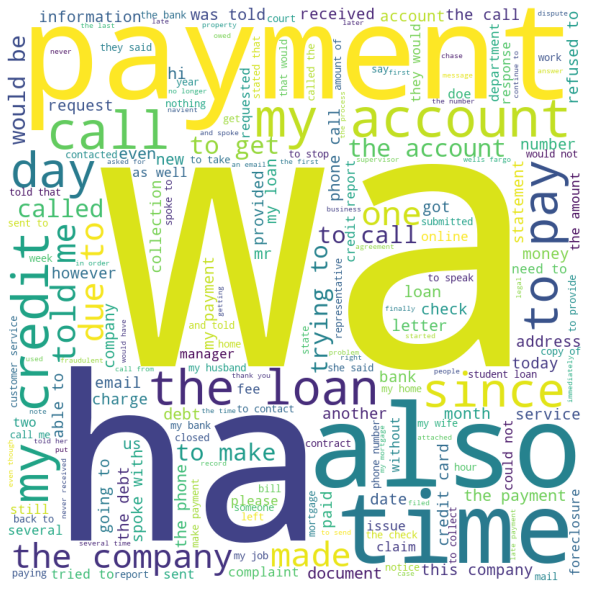

Cluster number: 1
on  i was expecting money to be deposited in my bank account my email address from zelle informed the money will be deposited to a account which i did not have a account. the senders sent the money through zelle. i received an email from zelle that  and sent money will be deposited in account. the problem is i do not have a account. i have an online account. i contacted zelle and someone informed me that has a link to my email. i informed zelle that i do not have a . the money that was sent from the two individuals was sent to a account that i do not have. my email address is being used by someone name with the last account number from who i do not know.

on  my item sold requiring immediate payment through paypal. on  i contacted paypal regarding a hold that was placed on the associated transaction id . i contacted paypal customer service by calling . the customer service representative answering the call is located in the . the customer service representative reques

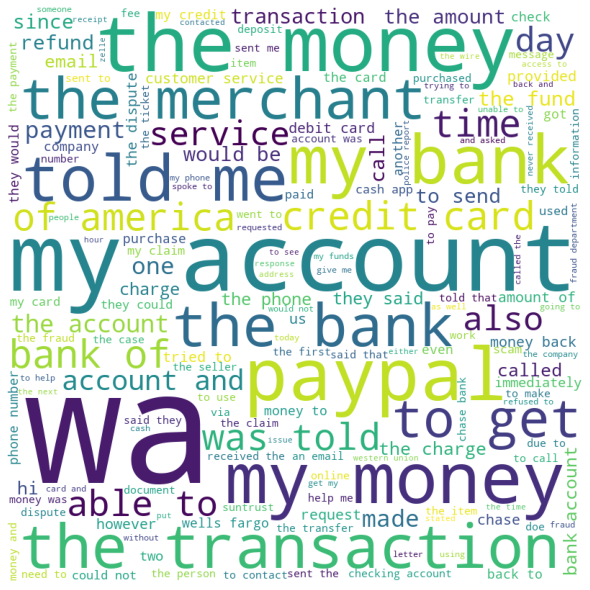

Cluster number: 2
Number of entries: 38


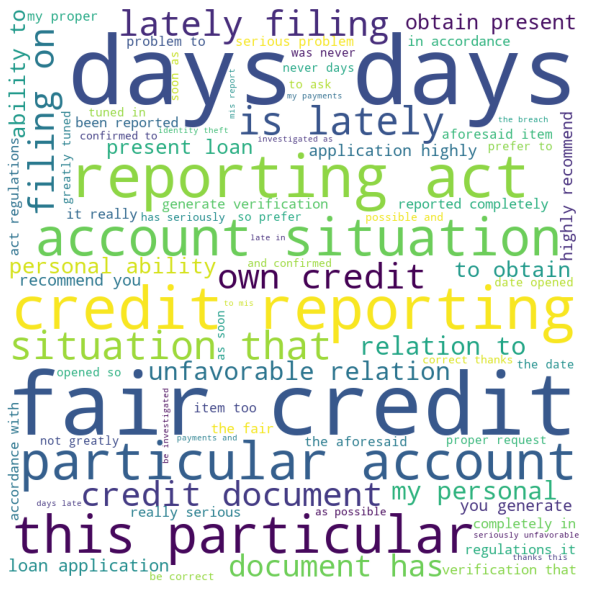

Cluster number: 3
Number of entries: 32


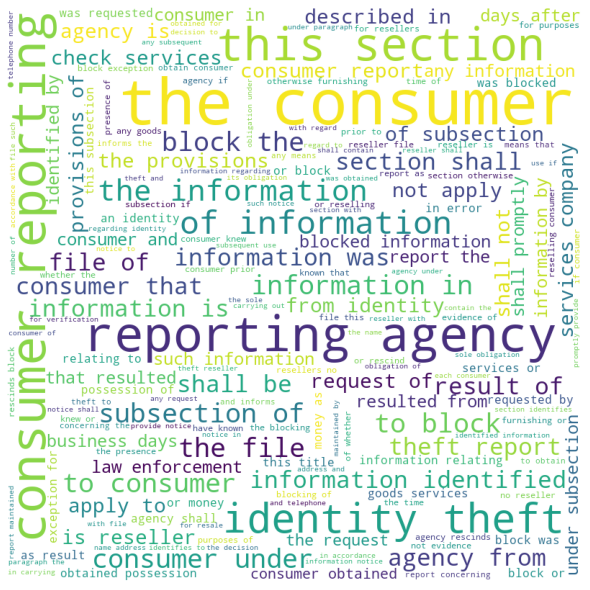

Cluster number: 4
i was involved in a vehicle accident on xx/xx/. i was not at fault and filed a claim through the " at fault driver s insurance company that company being . on xx/xx/ i received notification from the " at fault party s insurance provider that my vehicle a had been declared a total loss. i received notification via email on xx/xx/ from stating that a payment had been issued on my claim in the amount of 9100.00 to my lender wells fargo dealer services. on tuesday xx/xx/ after seeing that the outstanding balance on my loan had still not been satisfied i reluctantly made a payment in the amount of 180.00 . on xx/xx/ i contacted to confirm that a payment had been issued to wells fargo which was confirmed. at this time i was also given the supporting documentation to include both the check information and the tracking information. this included a delivery confirmation to the wells fargo auto offices in az. i then contacted wells fargo dealer services on xx/xx/ to express my 

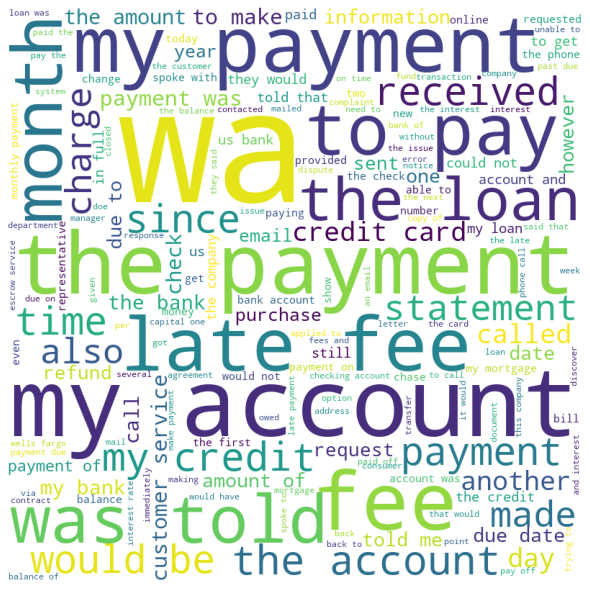

Cluster number: 5
i used a promotion from my sears credit card citi band mastercard for a balance transfer. the promotional letter was not clear that a fee would be charged. the promotion stated a 0.00 promotional apr on transferred balances until . when i noticed a transfer fee of 500.00 on my on line credit card statement on the 10000.00 transfer. i called and said i would pay the amount transferred to avoid the fee but they refused to cancel the fee. since the transaction was processed on xx/xx/ and i called on xx/xx/ and felt there would be no cost to them. thanks you 

my online checking account at hsbc usa was fraudulently accessed hacked . after getting access to my us account the hacker was able to access my linked accounts in where i was living at the time. they transferred approximately 30000.00 to the us accounts and then attempted a transfer to another account. i notified hsbc usa of the fraud and they were able to reverse the us transfer. however i was charged about 500.00

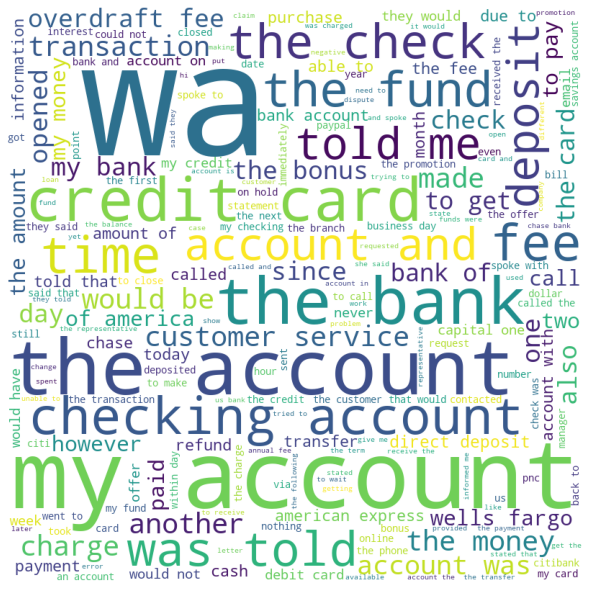

Cluster number: 6
the fcra says you have a duty to investigate. the circuit has clarified that the fair credit reporting act fcra requires furnishers of credit informationlike their credit reporting agency cra counterpartsto conduct " reasonable investigations of consumer disputes. the decision also identifies various factors that determine whether a furnishers investigation is " reasonable. the reasonableness of an investigation also depends on " what the furnisher knows about the dispute. the circuit explicitly rejected the argument that a furnisher may reduce its investigation simply because the cra failed to exhaustively describe the dispute in its automated consumer dispute verification acdv form. " when a furnisher has access to dispute-related information beyond the information provided by the cra it will often be reasonable for the furnisher to review that additional information and conduct its investigation accordingly. i have disputed several times and pointed out the inaccur

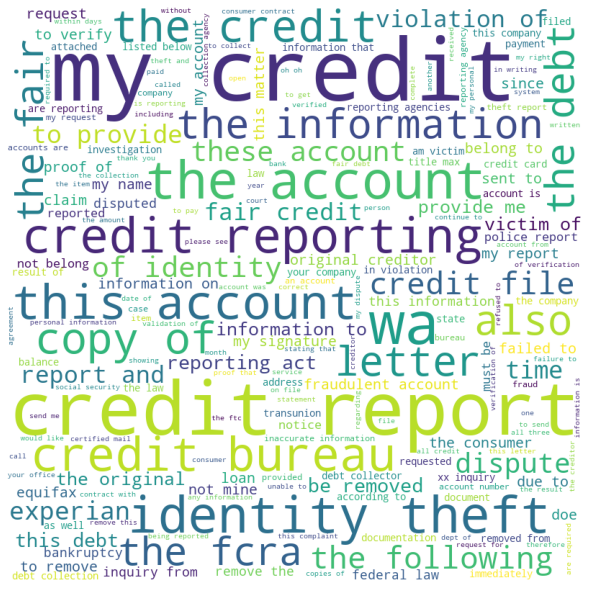

Cluster number: 7
i received a furniture loan on . i financed around 3000.00 . the same as cash loan was for 100 days. if you don t pay the loan off in 100 days the fee is 105 of the original loan. this is one of the worst finance companies i have ever seen as far as usury. they know that most people can not pay 3000.00 or whatever they re financing in 100 days then the lease fee kicks in. so i financed the 3000.00 and i m paying well over 6400.00 to pay it off. this is more than twice what i financed.i have been paying this loyally every two weeks and i m pretty sure i ve paid the original amount back and now in the process of paying the high lease fee payments.

i had a 21000.00 loan for college in . i had paid on and off since then and the loan defaulted. i got it out of default and have made ibr payments on time for the past year and 1/2 only to have navient say the total now due is 93000.00 . that is not right after all these years. i feel scammed and taken advantage of. i do not 

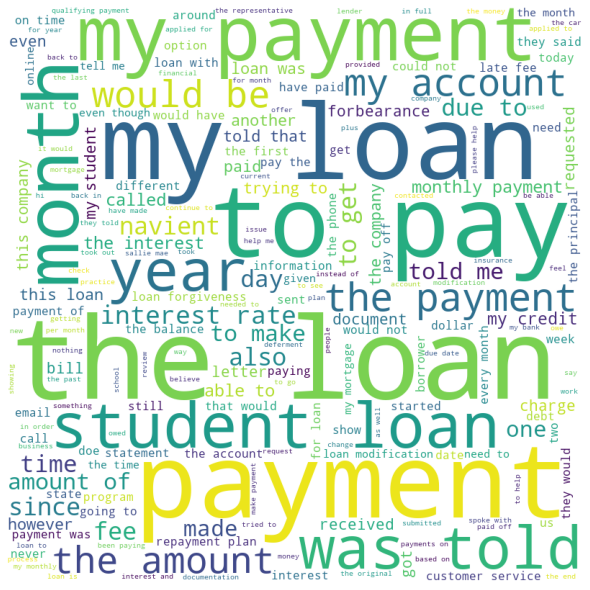

Cluster number: 8
Number of entries: 13


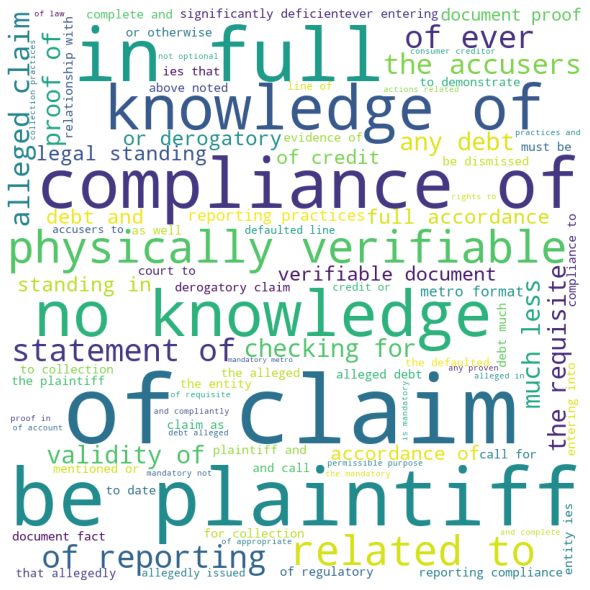

Cluster number: 9
 was reporting on all bureaus but was deleted from equifax in error.

wells fargo has incorrectly reported our mortgage loan balance as increasing to and for two months in a row. on xx/xx/ wells fargo incorrectly reported a balance increase of 540.00 from 75000.00 to 76000.00 . on xx/xx/ wells fargo incorrectly reported a balance increase of 1600.00 from 76000.00 to 77000.00 . the loan balance as of xx/xx/ on the wells fargo page for our account is 74000.00 . this has had a negative impact on our credit report for two months running lowering our score.

this is not a duplicate complaint. is reporting an account with the incorrect account number thus all three bureaus are reporting on this item incorrectly. the account number . the collection was originally through a lender called . however only reports with their reference number . because of this error reports the item as open and active in collections. reports the item as a charge off meaning that i still owe money 

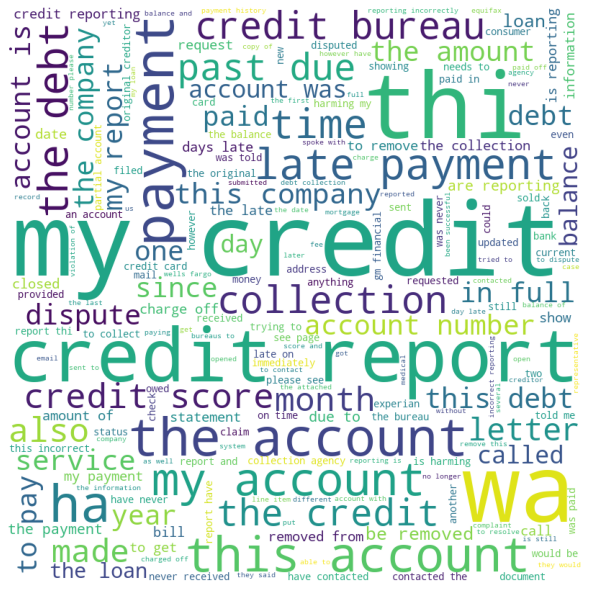

Cluster number: 10
Number of entries: 10


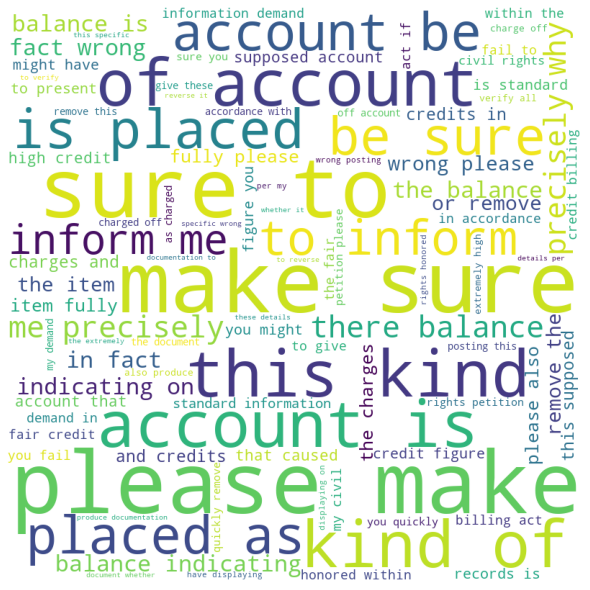

Cluster number: 11
Number of entries: 40


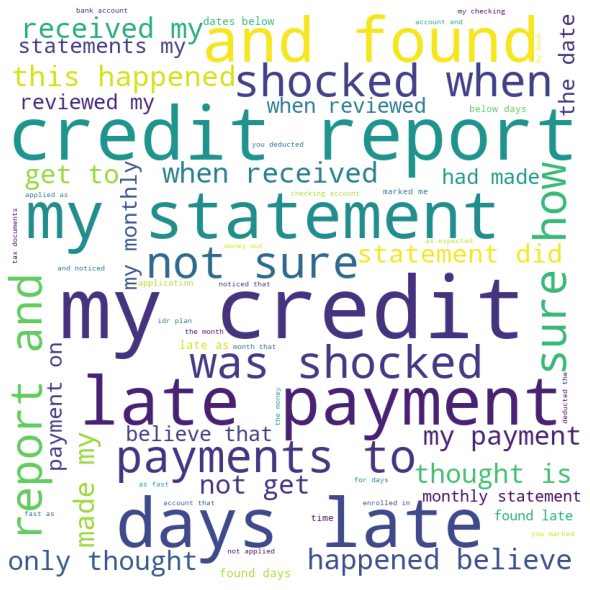

Cluster number: 12
Number of entries: 25


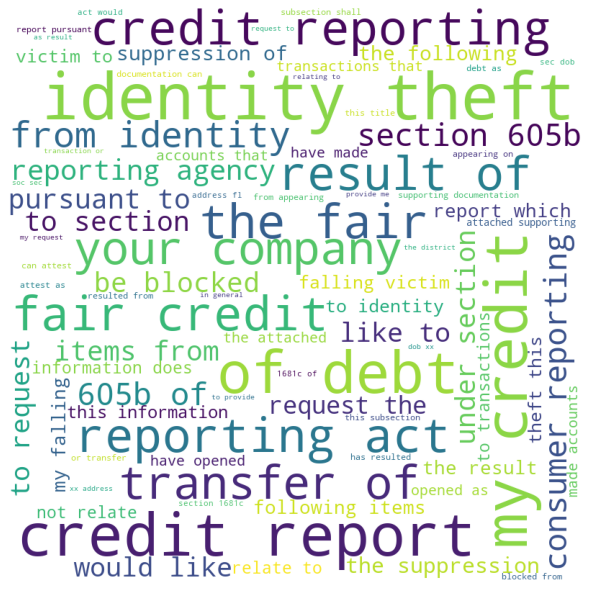

Cluster number: 13
on or around xx/xx/ i started getting calls from money key at that i owed a debit to them loan number i have never had loan with this company in my life my bank account was compromised around this same time when i lost my ss number my bank and i closed that account and started a new one money key some how had my phone numbers from my phone and was calling my contacts looking for me i do not i repeat do not do online loans nor have i ever had one with money key this is money keys mailing address xx/xx/ de 

i was not notified properly that my forbearance was expiring in . i was traveling for work in ny and had all my mail forward but it is unreliable. i have specifically requested email and/or phone calls for best way to reach me. i normally receive an email that states that my payment is due last one i received in xx/xx/. i never received anything stated my payments were do in . i did not get notifications until /. i contacted in to put my accounts back on forbearanc

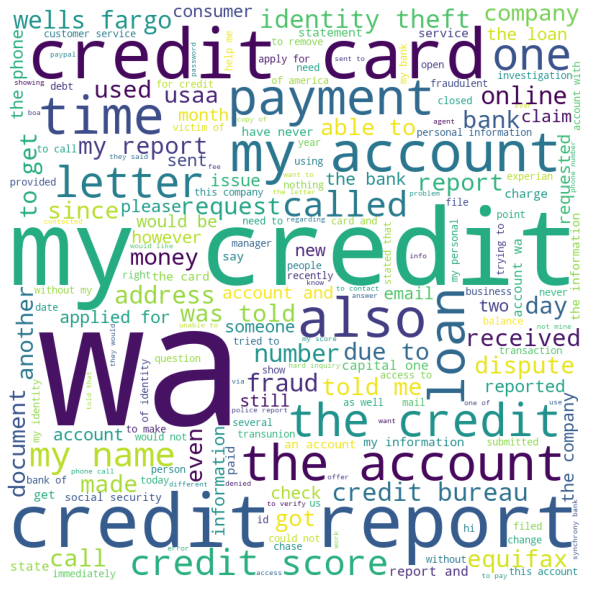

Cluster number: 14
i was pressured into co-signing a very expensive auto loan with ally financial by a car salesman and general manager at . i was coerced by the salesman and told that my credit would be the only way the loan could be secured. at the time i did not have steady employment or income to afford the payments on the loan if the owner could not pay. emotional tactics were used to coerce me into signing the loan. i was under duress when the loan was signed. i had even cried before signing the paperwork. i am now unable to pay the loan as stated in the beginning and i was unaware of the interest rate or total amount of the loan. at the time i was and since then my credit has been ruined and neither i or the other co-signer can afford this loan. the salesman knew i did not have steady employment. i was working and had already signed for my own car loan that day.

i ask chase auto finance to 1 please honor the written agreement and refund an amount of based on the excess mileage 

Number of entries: 852


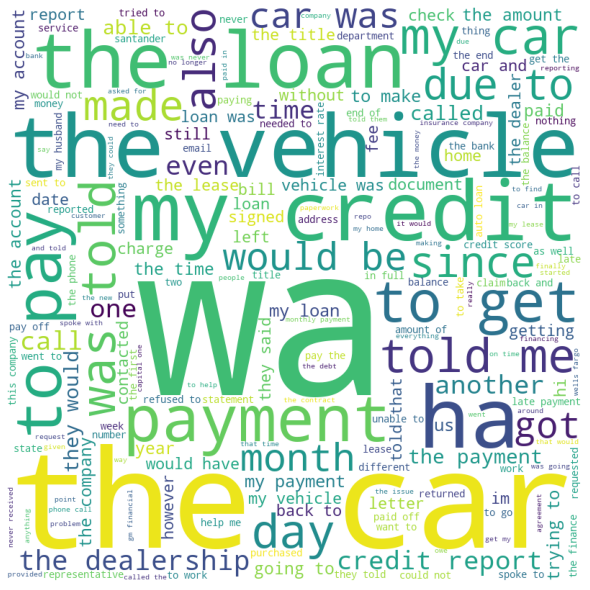

Cluster number: 15
 and goldman sachs opened a ccard with credit line. a scam

summary 1. 3 1/2 years of continued fraud no access to online banking & 2. blockage on the card statements online & requests for statement refused to be sent & 3. failure to correct fraudulent transactions & /or disclosure the transaction on a written statements & 4. balance & payment amounts no access & refused when i call into the company & 5. negative credit reports without access & 6. negative payment history no access online or call in & 7. the card has privacy issues as it appears the account has been taken over by a 3rd party for a period of 3 1/2 years this has been continuous & ongoing.to my knowledge there is no citibank mastercard. i did not ask for a change from citibank visa my original card to citibank mastercard. no terms were issued or any other disclosures. i believe this card is issued in fraud & account is taken over by a 3rd party.

i was scammed by 2 diffrent companies. i paid 990.00 on 

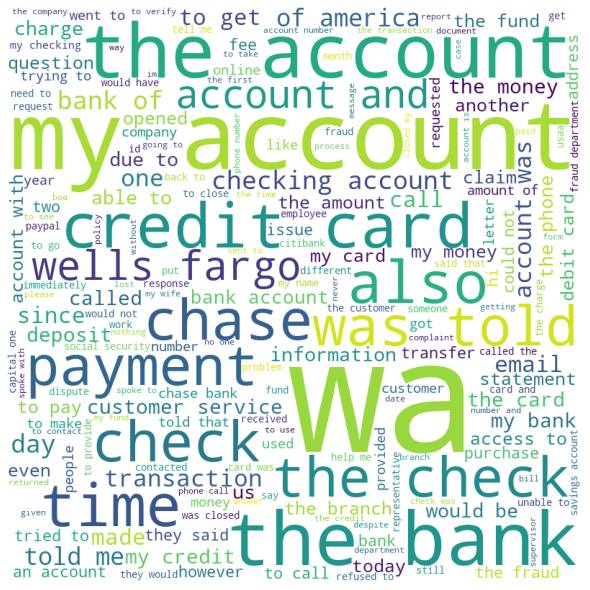

In [10]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import random

#if it's your first time running with these stopwords, run the following line aswell:
#nltk.download('stopwords')

stopwords = set(stopwords.words('english'))
stopwords.add('xx')
stopwords.add('wa')

for i in range(0,number_clusters):
    all_words = ''
    print('Cluster number: '+str(i))
    amount = 0
    for index, row in df_result.iterrows():
        if row[0] == i:
            all_words += ' ' + row['Consumer complaint narrative']
            rand = random.randint(1,200)
            amount += 1
            if(rand == 1):
                print(row['Consumer complaint narrative'] + '\n')
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_words) 
    print('Number of entries: ' + str(amount))
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 


## Visualizing clusters

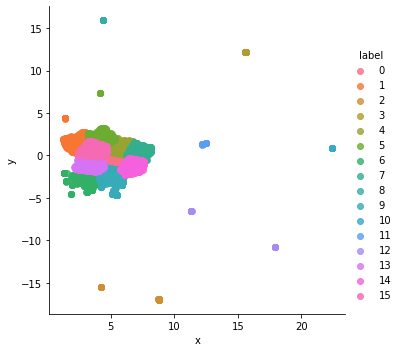

In [11]:
import seaborn as sns
_labels = pd.DataFrame(indexes)
labels = _labels.rename(columns={0: 'label'}) 

_reduced = pd.DataFrame(data_reduced)
reduced = _reduced.rename(columns={0: 'x', 1: 'y'}) 

clusters = pd.concat([reduced, labels], axis = 1)


facet = sns.lmplot(data=clusters, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)
